# Import the libraries

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('FIFA_2018.csv')

# Creating the dependent variable

In [6]:
y = (data['Man of the Match'] == "Yes")

# Creating the independent variables

In [7]:
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
x = data[feature_names]

# Train the decision tree model

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [10]:
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state=1)

In [11]:
dt_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_x,train_y)

In [15]:
pred_y = dt_model.predict(test_x)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [17]:
cm = confusion_matrix(test_y,pred_y)
print(cm)
accuracy_score(test_y,pred_y)

[[ 9  7]
 [ 6 10]]


0.59375

# Train the random forest model

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1).fit(train_x,train_y)

In [21]:
pred_y = rf_model.predict(test_x)

In [22]:
cm = confusion_matrix(test_y,pred_y)
print(cm)
accuracy_score(test_y,pred_y)

[[10  6]
 [ 3 13]]


0.71875

# Which features are impacting the model

In [24]:
pip install eli5

  Using cached https://files.pythonhosted.org/packages/c4/f4/770ae9385990f5a19a91431163d262182d3203662ea2b5739d0fcfc080f1/tabulate-0.8.7-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [25]:
from eli5.sklearn import PermutationImportance

C:\Python\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Python\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [27]:
perm = PermutationImportance(rf_model, random_state=1).fit(test_x,test_y)

In [28]:
import eli5

## Impactful/Influential variables for Random forest model

In [29]:
eli5.show_weights(perm, feature_names = test_x.columns.tolist())

Weight,Feature
0.1750 ± 0.1159,Goal Scored
0.0625 ± 0.0685,On-Target
0.0500 ± 0.0848,Pass Accuracy %
0.0375 ± 0.0468,Blocked
0.0312 ± 0.0559,Ball Possession %
0.0250 ± 0.0612,Saves
0.0187 ± 0.0637,Distance Covered (Kms)
0.0063 ± 0.0468,Corners
0 ± 0.0000,Yellow & Red
0 ± 0.0000,Red


### The weights indicate by how much percentage the model accuracy is impacted by the variable when the variables are re-shuffled. For eg: For Goal Scored the model accuracy improves by 17.5% in a range of +- 11.59%

## Impactful/Influential variables for Decision tree model

In [30]:
perm = PermutationImportance(dt_model, random_state=1).fit(test_x,test_y)

In [31]:
eli5.show_weights(perm, feature_names = test_x.columns.tolist())

Weight,Feature
0.1437 ± 0.1159,Goal Scored
0.0312 ± 0.0395,On-Target
0.0187 ± 0.0306,Distance Covered (Kms)
0.0063 ± 0.0729,Off-Target
0 ± 0.0000,Red
0 ± 0.0000,Ball Possession %
0 ± 0.0000,Blocked
0 ± 0.0000,Offsides
0 ± 0.0000,Goals in PSO
0 ± 0.0000,Saves


### As we can see that there are significant differences in the list of impactful variables in the 2 models and the weights for common variables like 'Goal score' has also changed

In [33]:
pip install pdpbox

  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp37-none-any.whl size=57690734 sha256=5f5eeba8219d6cb8c5b7dcaf1c3ed9da8877cb9d7c87c04fb370a56da630a552
  Stored in directory: C:\Users\d950369\AppData\Local\pip\Cache\wheels\7d\08\51\63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
Note: you may need to restart the kernel to use updated packages.


In [35]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

In [36]:
feature_to_plot = 'Distance Covered (Kms)'

In [38]:
pdp_dist = pdp.pdp_isolate(model=dt_model,dataset=test_x,
                           model_features=feature_names,
                           feature= feature_to_plot)

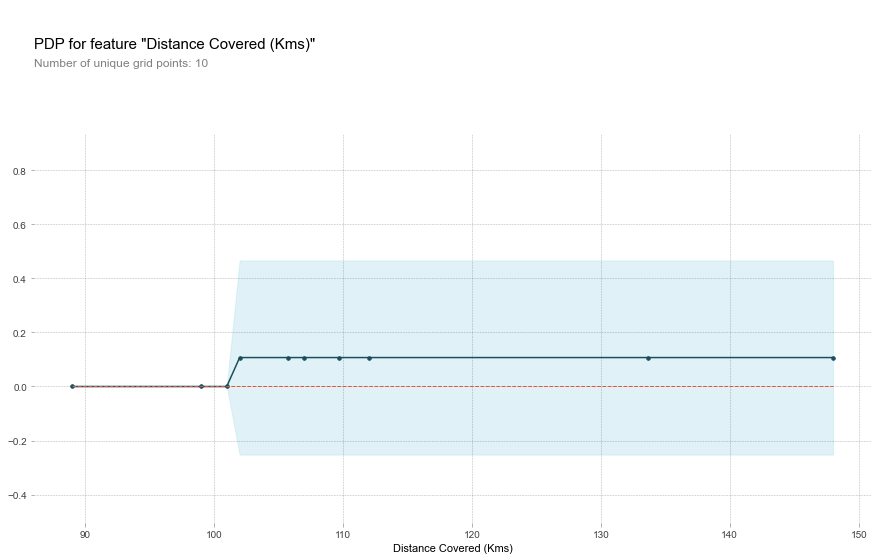

In [39]:
pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

### If distance covered is 102 KM, then that influences the model, but if >102Km is covered or <102 Km then that does not influence the model. The PDP(Partial dependence plots) plots help to provide an insight into the threshold values of the features that influence the model

## For Random Forest model

In [40]:
pdp_dist = pdp.pdp_isolate(model=rf_model,dataset=test_x,
                           model_features=feature_names,
                           feature= feature_to_plot)

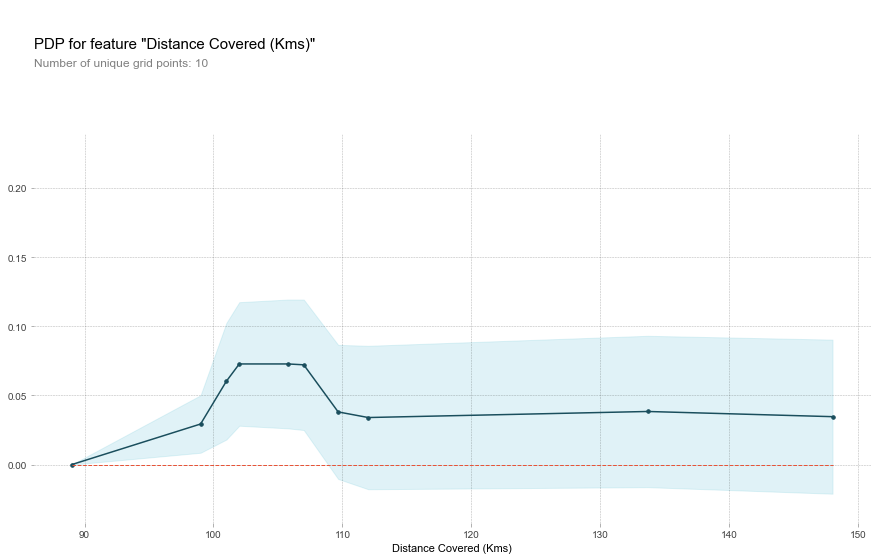

In [41]:
pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

### For RF, distance of 99-109 has influence on the model